<img src="julia.png" width="150" style="margin-right:10px;"> <span style="font-size: 20pt;">Live Coding Demo</span> <span style="font-size: 15pt;"><i>(Jupyter Notebook)</i></span>

### Dynamic Typing

In [1]:
x = 10
println(typeof(x))

Int64


In [2]:
x = "Julia"
println(typeof(x))

String


### Static Typing

In [3]:
y::Int = 5
println(typeof(y))

Int64


In [4]:
y = 12

12

In [5]:
y = "This is y-axis."

LoadError: MethodError: [0mCannot `convert` an object of type [92mString[39m[0m to an object of type [91mInt64[39m

[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:6[24m[39m
[0m  convert(::Type{T}, [91m::T[39m) where T
[0m[90m   @[39m [90mBase[39m [90m[4mBase.jl:84[24m[39m
[0m  convert(::Type{T}, [91m::Number[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:7[24m[39m
[0m  ...


### Defining constants (by convention, use uppercase)

In [6]:
const PI_APPROX = 3.14159

println("An approximation of PI is ", PI_APPROX)

An approximation of PI is 3.14159


In [7]:
PI_APPROX = ℯ

LoadError: invalid redefinition of constant Main.PI_APPROX

### Type System

<img src="julia-type-hierarchy-of-numbers.png">

In [8]:
println(typeof(42))  
println(supertype(Int64))
println(supertype(Signed))
println(supertype(Integer))
println(supertype(Real))
println(supertype(Number))

Int64
Signed
Integer
Real
Number
Any


In [9]:
function circle_area(radius::Real)
    return π * radius^2
end

circle_area (generic function with 1 method)

In [10]:
println(circle_area(4))

50.26548245743669


In [11]:
println(circle_area(3 + 4im))

LoadError: MethodError: no method matching circle_area(::Complex{Int64})

[0mClosest candidates are:
[0m  circle_area([91m::Real[39m)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[9]:1[24m[39m


### Control Structures (Loops) 

In [12]:
for i in 1:5
    print(i, " ")
end

1 2 3 4 5 

In [13]:
i = 1
while i <= 5
    print(i^2, " ")
    i += 1
end

1 4 9 16 25 

In [14]:
cubes = [n^3 for n in 1:50]
println(cubes)

[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000, 1331, 1728, 2197, 2744, 3375, 4096, 4913, 5832, 6859, 8000, 9261, 10648, 12167, 13824, 15625, 17576, 19683, 21952, 24389, 27000, 29791, 32768, 35937, 39304, 42875, 46656, 50653, 54872, 59319, 64000, 68921, 74088, 79507, 85184, 91125, 97336, 103823, 110592, 117649, 125000]


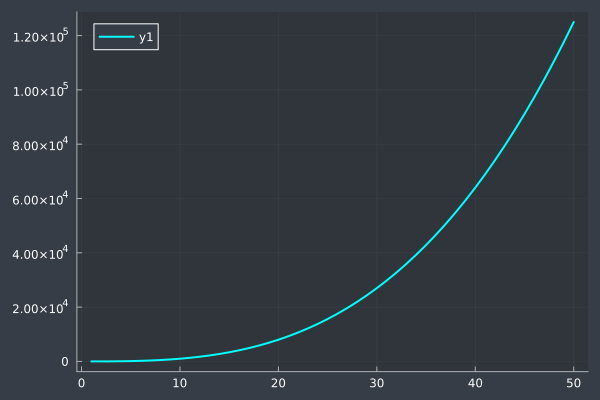

In [15]:
using Plots

theme(:dark)

plot(cubes, linewidth=2, linecolor=:cyan)

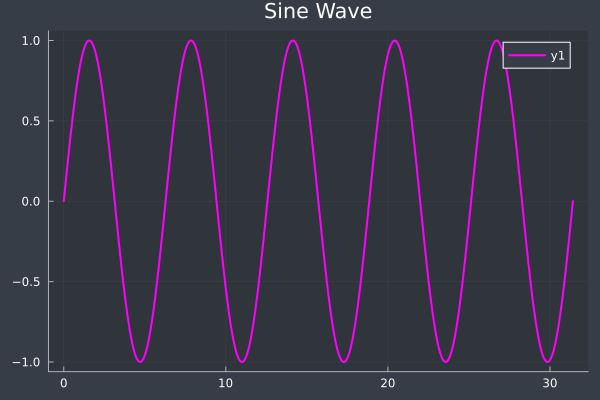

In [17]:
plot(sin, 0, 10π, linewidth=2, linecolor=:magenta, title="Sine Wave")

### Interoperability with python

In [18]:
using PyCall

np = pyimport("numpy")

np_matrix = np.array([[1, 2, 3, 4],
                      [2, 1, 2, 3],
                      [3, 2, 1, 2],
                      [4, 3, 2, 1]])

4×4 Matrix{Int64}:
 1  2  3  4
 2  1  2  3
 3  2  1  2
 4  3  2  1

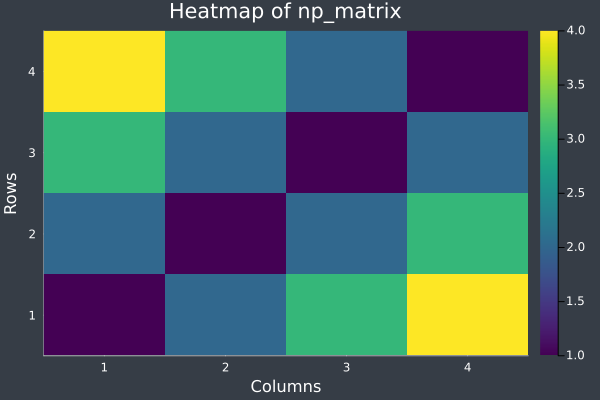

In [19]:
heatmap(np_matrix, color=:viridis, xlabel="Columns", ylabel="Rows", title="Heatmap of np_matrix")

### Conditional statements

In [20]:
function water_state(temp_celsius::Float64)
    if temp_celsius <= 0.0
        return "Ice"
    elseif temp_celsius < 100.0
        return "Liquid water"
    else
        return "Steam"
    end
end

water_state (generic function with 1 method)

In [21]:
temperatures = [-5.0, 20.0, 105.0]

for temp in temperatures
    println("At $(temp)°C, water is: ", water_state(temp))
end

At -5.0°C, water is: Ice
At 20.0°C, water is: Liquid water
At 105.0°C, water is: Steam


### Macros

In [22]:
macro sayhello(name)
    return :(println("Hello, ", $name, "!"))
end

@sayhello (macro with 1 method)

In [23]:
@sayhello "World"
@sayhello 404

Hello, World!
Hello, 404!


### Parametric Types

In [24]:
struct Rectangle{T<:Real}
    width::T
    height::T
end

In [25]:
r1 = Rectangle(4, 6)

Rectangle{Int64}(4, 6)

In [26]:
r2 = Rectangle(4.7, 6.2)

Rectangle{Float64}(4.7, 6.2)

In [27]:
using RDatasets

In [28]:
iris = dataset("datasets", "iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [29]:
describe(iris)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,0,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,0,Float64
3,PetalLength,3.758,1.0,4.35,6.9,0,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,0,Float64
5,Species,,setosa,,virginica,0,"CategoricalValue{String, UInt8}"


In [30]:
first(iris, 5)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [31]:
names(iris)

5-element Vector{String}:
 "SepalLength"
 "SepalWidth"
 "PetalLength"
 "PetalWidth"
 "Species"

In [32]:
unique(iris.Species)

3-element Vector{String}:
 "setosa"
 "versicolor"
 "virginica"

In [33]:
setosa = filter(row -> row.Species == "setosa", iris)

first(setosa, 5)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


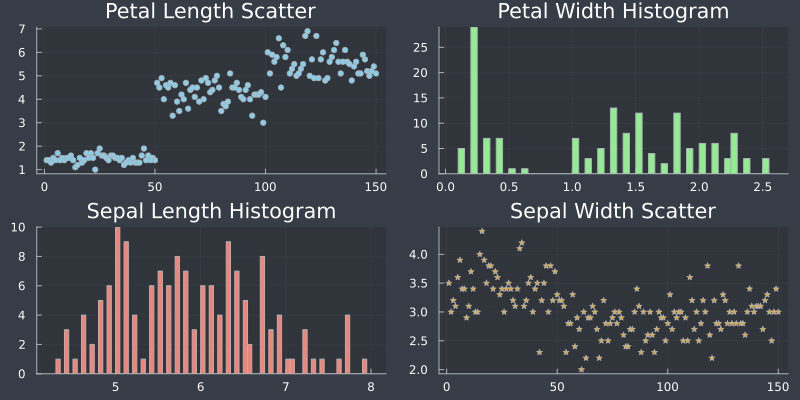

In [34]:
p1 = scatter(iris.PetalLength, title="Petal Length Scatter", 
             color=:skyblue, marker=:circle, markersize=3, legend=false)

p2 = histogram(iris.PetalWidth, title="Petal Width Histogram", 
               color=:lightgreen, bins=100, legend=false)

p3 = histogram(iris.SepalLength, title="Sepal Length Histogram", 
               color=:salmon, bins=100, legend=false)

p4 = scatter(iris.SepalWidth, title="Sepal Width Scatter",
             color=:orange, marker=:star5, markersize=3, legend=false)

plot(p1, p2, p3, p4, layout=(2, 2), size=(800, 400), legend=false)

<p align="center">
    <img src="karami-mehdi.png" width="450">
</p>